# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist

The idea of histogram equalization is that the pixels should be distributed evenly over the whole intensity range, i.e. the aim is to transform the image so that the output image has a flat histogram ⇒ Contrast Enhancement ==> the contrast increases and the details of the dark regions appear clearly

In [2]:
from commonfunctions import *
# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


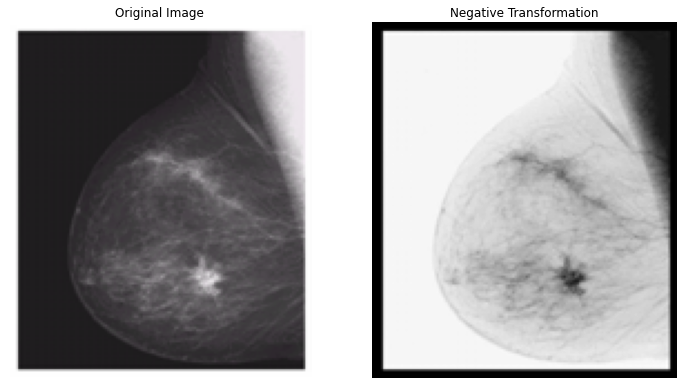

In [30]:
'''
1
Negative Transformation
'''
# Read image ‘Picture1.png’
img = io.imread('imgs/Picture1.png')

'''
Define function ‘Negative’ that apply Negative transformation 
for any image and any threshold. What is the equation???
'''
def negative(img, L):
    grayscale_img = rgb2gray(img)
    height, width = grayscale_img.shape
    for i in range(0, height):
        for j in range(0, width):
            grayscale_img[i, j] = L - 1 - grayscale_img[i, j]
    
    '''
    rows, cols, _ = img.shape
    neg_img = np.copy(img)
    for i in range(0, rows):
        for j in range(0, cols):
            pixel = neg_img[i, j]
            
            pixel[0] = L - 1  - pixel[0]
            pixel[1] = L - 1  - pixel[1]
            pixel[2] = L - 1  - pixel[2]
            
            neg_img[i, j] = pixel
    '''
                
    return grayscale_img

neg_img = negative(img, 225)
show_images([img, neg_img], ['Original Image', 'Negative Transformation'])
    



In [ ]:
'''
2
Contrast Enhancement
'''



In [ ]:
'''
3
Gamma Correction
'''



In [ ]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass
    
